In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:

Drops=['Unnamed: 0','Unnamed: 24','Unnamed: 13','Global Horizontal UV Irradiance (280-400nm)','Global Horizontal UV Irradiance (295-385nm)','DHI','DNI','Clearsky DHI','Clearsky DNI','Fill Flag','File']
GroupedBy=['Latitude','Longitude','Year','Month','Day','Hour']
data_path='/home/bleon/Documents/DS4A/DS4A_Project/Processed_Data/'
data=pd.read_csv(data_path+'MeteorCOLUnited.csv').drop(columns=Drops).groupby(GroupedBy).mean().reset_index()

data["Location"]=list(zip(data['Latitude'],data['Longitude']))
data["Year1"]=data["Year"].astype("str")
locations=data["Location"].unique().tolist()
variables=["GHI","Wind Speed"]

data.head(10)

,Latitude,Longitude,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,...,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Location,Year1
0,4.29,-74.82,2016,1,1,0,15.0,0.0,0.0,0.0,...,160.665,0.157,1.25,4.9305,272.9,83.705,27.0,975.0,"(4.29, -74.82)",2016
1,4.29,-74.82,2016,1,1,1,15.0,0.0,0.0,1.0,...,154.200,0.157,1.10,4.9030,272.7,85.780,26.5,970.0,"(4.29, -74.82)",2016
2,4.29,-74.82,2016,1,1,2,15.0,0.0,0.0,0.5,...,142.875,0.157,1.10,4.8880,271.8,87.355,26.0,970.0,"(4.29, -74.82)",2016
3,4.29,-74.82,2016,1,1,3,15.0,0.0,0.0,0.5,...,129.915,0.157,1.10,4.8875,268.6,86.390,25.5,970.0,"(4.29, -74.82)",2016
4,4.29,-74.82,2016,1,1,4,15.0,0.0,0.0,0.5,...,116.365,0.157,1.20,4.8995,265.0,88.400,25.0,970.0,"(4.29, -74.82)",2016
5,4.29,-74.82,2016,1,1,5,15.0,0.0,0.0,0.5,...,102.610,0.157,1.25,4.9345,264.6,90.750,25.0,975.0,"(4.29, -74.82)",2016
6,4.29,-74.82,2016,1,1,6,15.0,23.0,23.0,0.5,...,88.830,0.157,1.70,4.9955,264.6,84.010,26.5,980.0,"(4.29, -74.82)",2016
7,4.29,-74.82,2016,1,1,7,15.0,205.0,205.0,0.0,...,75.180,0.157,2.30,5.0685,251.7,70.080,29.5,980.0,"(4.29, -74.82)",2016
8,4.29,-74.82,2016,1,1,8,15.0,436.0,436.0,0.0,...,61.860,0.157,2.25,5.1395,231.3,61.790,31.5,980.0,"(4.29, -74.82)",2016
9,4.29,-74.82,2016,1,1,9,15.0,645.5,645.5,0.0,...,49.205,0.157,2.15,5.1960,220.4,54.290,33.5,980.0,"(4.29, -74.82)",2016


First we define he Horizontal function, where data is turned into a horizontal dataframe with years as columns for the input variable

In [3]:

def Horizontal(location,variable):
    GroupedBy=['Location','Month','Day','Hour']
    Horizontal_data=data[data["Location"]==location].reset_index().fillna(0).pivot_table(index=GroupedBy,columns='Year1',values=variable,aggfunc=np.max).reset_index()
    return Horizontal_data

-0.0030161961194223657


(array([ 12.,  78., 436., 531., 463., 150.,  56.,  19.,   6.,   1.]),
 array([-0.22461597, -0.16517917, -0.10574238, -0.04630558,  0.01313122,
         0.07256802,  0.13200481,  0.19144161,  0.25087841,  0.3103152 ,
         0.369752  ]),
 <BarContainer object of 10 artists>)

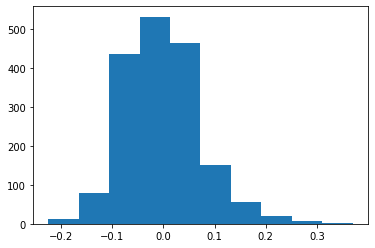

In [4]:
#Testing on one locaton
loc0_GHI=Horizontal(locations[5],"Wind Speed").dropna()

columns_Years=list(loc0_GHI.columns)[4:-1]
columns_Years
X=loc0_GHI[columns_Years]
Y=loc0_GHI['2020']
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.2)

linear_model=LinearRegression().fit(X_train,y_train)
testing_2020=linear_model.predict(X_test)
distance=y_test-testing_2020
print(distance.mean())
plt.hist(distance)

In [9]:
def Predictor_2021(location,variable):
    StrLoc=str(location)
    df=Horizontal(location,variable).dropna()
    cols=list(df.columns)[4:]
    X_train=df[cols[:-1]]
    Y_train=df[cols[-1]]
    X_predict=df[cols[1:]]
    
    linear_model=LinearRegression().fit(X_train,Y_train)
    pred_2021=linear_model.predict(X_predict)
    df['Resids_2020']=linear_model.predict(X_train)-Y_train
    df[StrLoc+' 2021 prediction '+variable]=pred_2021.round(2)
    df["datetime 2021"]=pd.to_datetime("2021-"+df["Month"].astype("str")+"-"+df["Day"].astype("str")+" "+df["Hour"].astype("str")+":00:00")
    return df

In [10]:
Loc6_GHI=Predictor_2021(locations[6],"GHI")

Loc6_GHI.head(10)

Year1,Location,Month,Day,Hour,1999,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,Resids_2020,2021 prediction GHI,datetime 2021
0,"(8.37, -74.9)",1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.517793,1.52,2021-01-01 00:00:00
1,"(8.37, -74.9)",1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.517793,1.52,2021-01-01 01:00:00
2,"(8.37, -74.9)",1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.517793,1.52,2021-01-01 02:00:00
3,"(8.37, -74.9)",1,1,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.517793,1.52,2021-01-01 03:00:00
4,"(8.37, -74.9)",1,1,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.517793,1.52,2021-01-01 04:00:00
5,"(8.37, -74.9)",1,1,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.517793,1.52,2021-01-01 05:00:00
6,"(8.37, -74.9)",1,1,6,4.5,14.0,13.0,11.0,12.0,12.5,...,12.5,12.5,1.0,13.0,7.0,14.0,11.0,1.575754,12.77,2021-01-01 06:00:00
7,"(8.37, -74.9)",1,1,7,97.5,181.5,88.5,166.0,167.0,168.0,...,172.0,173.5,17.0,174.5,70.5,177.0,105.5,43.594391,139.60,2021-01-01 07:00:00
8,"(8.37, -74.9)",1,1,8,217.5,414.0,268.5,175.5,395.0,394.0,...,296.5,407.0,54.0,297.0,252.0,406.5,336.0,-12.642828,327.72,2021-01-01 08:00:00
9,"(8.37, -74.9)",1,1,9,346.0,624.0,612.0,360.0,604.5,603.0,...,615.5,621.0,239.5,510.0,417.0,616.5,430.0,104.101020,520.24,2021-01-01 09:00:00


In [ ]:

#Ejemplo

# Loc6_GHI=Predictor_2021(locations[6],"Wind Speed")

Loc6_GHI.head(10)

Year1,Location,Month,Day,Hour,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"(8.37, -74.9)",1,1,0,0.20,0.4,0.15,0.15,0.10,0.35,...,0.30,0.10,0.25,0.1,0.20,0.10,0.30,0.20,0.20,0.172249
1,"(8.37, -74.9)",1,1,1,0.20,0.4,0.30,0.10,0.10,0.30,...,0.30,0.10,0.20,0.2,0.20,0.10,0.25,0.20,0.20,0.166139
2,"(8.37, -74.9)",1,1,2,0.20,0.4,0.25,0.10,0.10,0.30,...,0.25,0.10,0.15,0.2,0.20,0.10,0.20,0.20,0.20,0.154532
3,"(8.37, -74.9)",1,1,3,0.20,0.4,0.20,0.10,0.10,0.30,...,0.20,0.10,0.10,0.2,0.20,0.10,0.20,0.25,0.20,0.149103
4,"(8.37, -74.9)",1,1,4,0.20,0.4,0.20,0.10,0.05,0.30,...,0.20,0.15,0.10,0.2,0.15,0.05,0.20,0.20,0.15,0.145094
5,"(8.37, -74.9)",1,1,5,0.20,0.4,0.20,0.10,0.00,0.25,...,0.20,0.05,0.10,0.2,0.10,0.00,0.20,0.20,0.20,0.152463
6,"(8.37, -74.9)",1,1,6,0.15,0.3,0.15,0.15,0.00,0.15,...,0.15,0.00,0.05,0.2,0.15,0.05,0.15,0.20,0.25,0.127915
7,"(8.37, -74.9)",1,1,7,0.10,0.1,0.10,0.00,0.00,0.10,...,0.10,0.10,0.00,0.2,0.00,0.00,0.10,0.10,0.10,0.043362
8,"(8.37, -74.9)",1,1,8,0.10,0.1,0.10,0.10,0.10,0.10,...,0.10,0.10,0.10,0.2,0.00,0.00,0.10,0.15,0.10,0.101790
9,"(8.37, -74.9)",1,1,9,0.05,0.1,0.10,0.10,0.10,0.20,...,0.20,0.15,0.15,0.2,0.10,0.10,0.05,0.20,0.10,0.127472


Example of prediction for 2021 for 1 location (location 6)

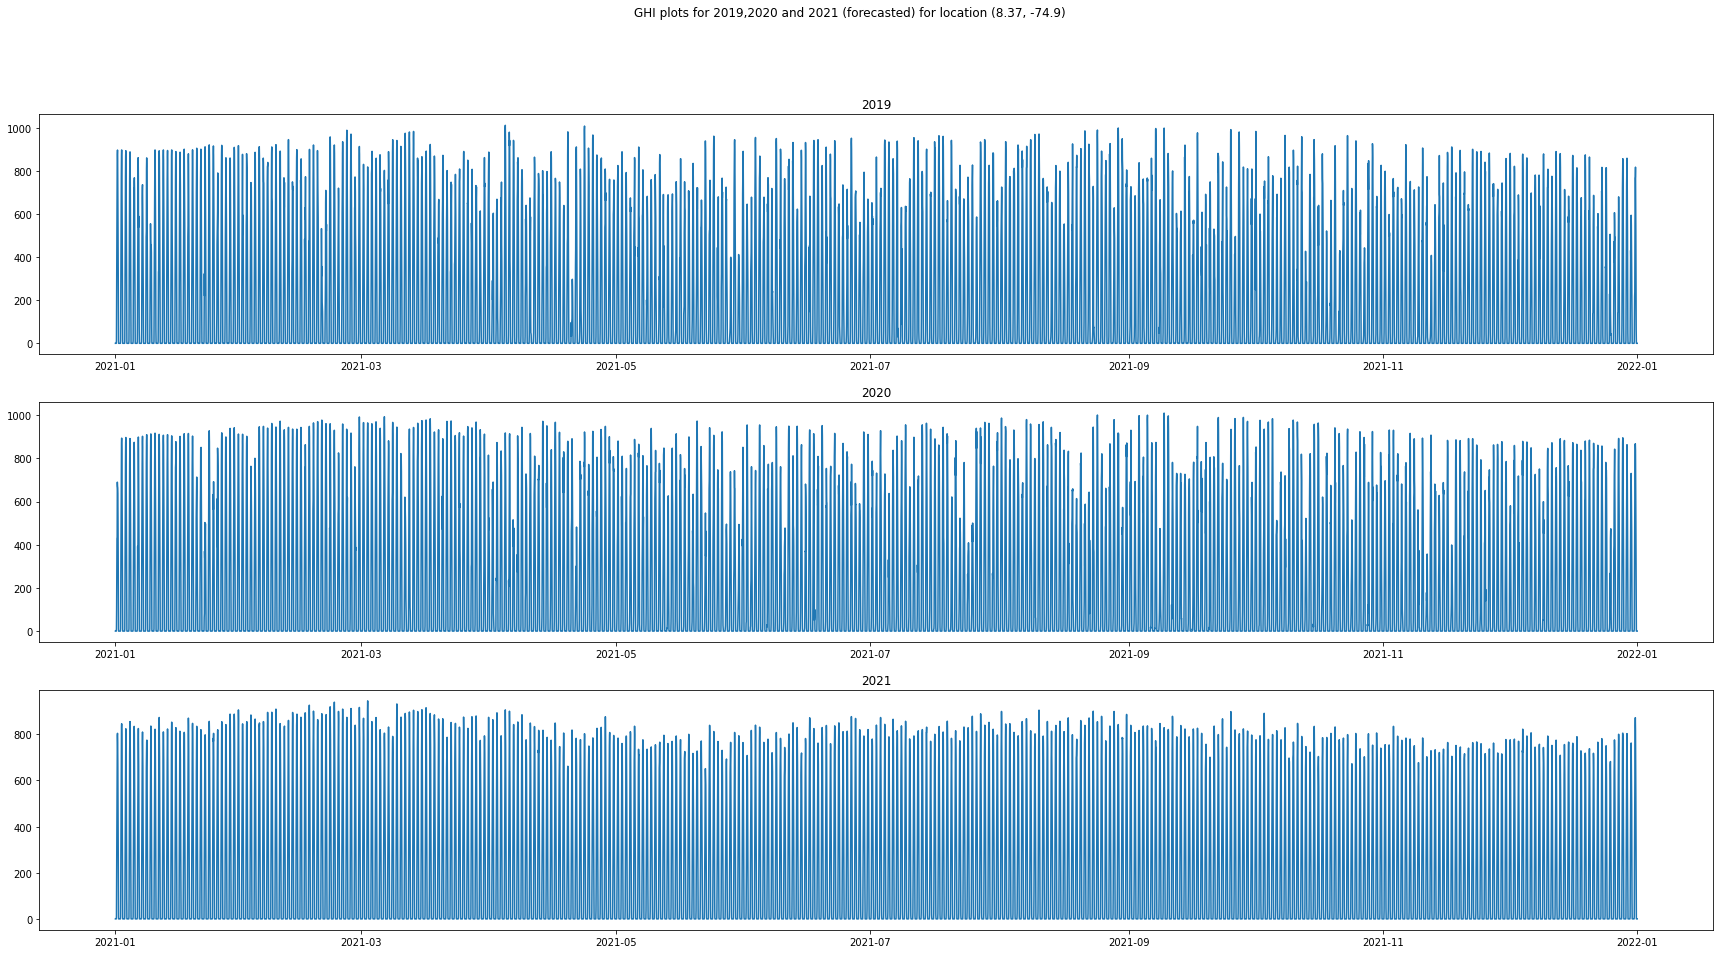

In [12]:
fig,(axes)=plt.subplots(3,1,figsize=(30,15))
axes[0].plot(Loc6_GHI["datetime 2021"],Loc6_GHI["2019"])
axes[0].set_title('2019')
axes[1].plot(Loc6_GHI["datetime 2021"],Loc6_GHI["2020"])
axes[1].set_title('2020')
axes[2].plot(Loc6_GHI["datetime 2021"],Loc6_GHI["2021 prediction GHI"])
axes[2].set_title('2021')
plt.suptitle("GHI plots for 2019,2020 and 2021 (forecasted) for location {}".format(locations[6]))
plt.show()


In [20]:
GHI_preds=pd.DataFrame()
i=0
for loc in locations:
   if not i:
      GHI_preds["datetime"]=Predictor_2021(loc,"GHI")["datetime 2021"]
      i+=1
   GHI_preds[str(loc)+" 2021 GHI"]=Predictor_2021(loc,"GHI")['2021 prediction GHI']

In [21]:
GHI_preds.describe()

,"(4.29, -74.82) 2021 GHI","(6.73, -76.7) 2021 GHI","(7.33, -75.78) 2021 GHI","(7.85, -76.82) 2021 GHI","(8.05, -75.18) 2021 GHI","(8.21, -76.38) 2021 GHI","(8.37, -74.9) 2021 GHI","(8.53, -76.7) 2021 GHI","(8.77, -75.86) 2021 GHI","(8.93, -75.46) 2021 GHI",...,"(9.73, -75.06) 2021 GHI","(9.73, -73.86) 2021 GHI","(10.21, -74.9) 2021 GHI","(10.41, -75.58) 2021 GHI","(10.45, -73.18) 2021 GHI","(10.49, -74.34) 2021 GHI","(10.69, -74.86) 2021 GHI","(10.77, -73.98) 2021 GHI","(10.97, -73.54) 2021 GHI","(11.33, -72.74) 2021 GHI"
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8736.000000,8760.000000,8760.000000,8760.000000,8760.000000,...,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,151.749831,183.442845,176.745188,213.993063,227.518969,200.908954,234.637869,210.643113,217.886884,225.373773,...,226.728930,248.260741,237.901389,239.780672,249.017647,240.014450,230.550243,197.979805,214.589929,240.839554
std,168.243508,235.662044,225.997019,276.700827,289.775526,252.502663,301.465921,265.088443,277.149561,288.644522,...,292.731592,317.926193,307.849676,292.742825,323.902258,310.403972,296.360827,256.223375,280.076783,308.506354
min,21.890000,3.520000,-0.510000,1.410000,1.650000,3.220000,1.520000,3.350000,1.340000,0.490000,...,-0.410000,0.490000,1.330000,14.020000,0.080000,1.470000,1.560000,5.110000,-1.290000,1.270000
25%,21.890000,3.520000,-0.510000,1.410000,1.650000,3.240000,1.520000,3.350000,1.340000,0.490000,...,-0.410000,0.490000,1.330000,14.020000,0.080000,1.470000,1.560000,5.110000,-1.290000,1.270000
50%,34.040000,11.750000,10.370000,10.690000,11.500000,12.065000,11.015000,12.805000,10.370000,11.040000,...,9.535000,10.465000,9.875000,26.520000,9.570000,9.660000,10.450000,14.550000,10.910000,11.310000
75%,292.707500,389.202500,371.387500,458.400000,503.012500,438.752500,510.497500,453.395000,487.092500,501.005000,...,494.835000,546.932500,519.290000,487.895000,526.947500,516.050000,490.792500,396.430000,449.477500,516.950000
max,604.740000,845.480000,848.810000,896.340000,890.720000,845.820000,943.840000,865.520000,882.040000,914.930000,...,925.710000,961.440000,965.220000,958.660000,981.960000,968.920000,956.580000,916.060000,1056.240000,946.650000


In [23]:
Wind_preds=pd.DataFrame()
i=0
for loc in locations:
   if not i:
      Wind_preds["datetime"]=Predictor_2021(loc,"Wind Speed")["datetime 2021"]
      i+=1
   Wind_preds[str(loc)+" 2021 Wind Speed"]=Predictor_2021(loc,"Wind Speed")['2021 prediction Wind Speed']

In [24]:
Wind_preds.describe()

,"(4.29, -74.82) 2021 GHI","(6.73, -76.7) 2021 GHI","(7.33, -75.78) 2021 GHI","(7.85, -76.82) 2021 GHI","(8.05, -75.18) 2021 GHI","(8.21, -76.38) 2021 GHI","(8.37, -74.9) 2021 GHI","(8.53, -76.7) 2021 GHI","(8.77, -75.86) 2021 GHI","(8.93, -75.46) 2021 GHI",...,"(9.73, -75.06) 2021 GHI","(9.73, -73.86) 2021 GHI","(10.21, -74.9) 2021 GHI","(10.41, -75.58) 2021 GHI","(10.45, -73.18) 2021 GHI","(10.49, -74.34) 2021 GHI","(10.69, -74.86) 2021 GHI","(10.77, -73.98) 2021 GHI","(10.97, -73.54) 2021 GHI","(11.33, -72.74) 2021 GHI"
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8736.000000,8760.000000,8760.000000,8760.000000,8760.000000,...,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,0.322323,0.474153,0.360680,0.767547,0.135688,0.238662,0.148935,1.564023,0.410301,0.303308,...,0.348313,0.081998,0.478347,2.619092,0.511671,0.571943,1.224330,1.419708,2.023950,2.063789
std,0.028319,0.213840,0.092657,0.242830,0.057093,0.065077,0.061018,0.450406,0.190188,0.184824,...,0.173371,0.034913,0.251198,0.226689,0.208872,0.217293,0.457598,0.370688,0.571106,0.573837
min,0.210000,0.180000,0.160000,0.340000,0.030000,0.080000,0.040000,0.500000,0.120000,0.030000,...,0.110000,0.000000,0.120000,2.060000,0.150000,0.220000,0.510000,0.670000,0.830000,0.910000
25%,0.310000,0.300000,0.300000,0.590000,0.090000,0.190000,0.100000,1.230000,0.290000,0.190000,...,0.230000,0.060000,0.330000,2.450000,0.340000,0.450000,0.920000,1.110000,1.550000,1.610000
50%,0.330000,0.380000,0.340000,0.690000,0.130000,0.250000,0.140000,1.520000,0.370000,0.260000,...,0.300000,0.090000,0.430000,2.590000,0.480000,0.510000,1.120000,1.390000,1.970000,2.010000
75%,0.340000,0.660000,0.400000,0.870000,0.180000,0.280000,0.190000,1.900000,0.470000,0.350000,...,0.410000,0.110000,0.520000,2.770000,0.650000,0.610000,1.370000,1.700000,2.450000,2.510000
max,0.370000,1.060000,0.730000,1.730000,0.380000,0.510000,0.380000,2.730000,1.370000,1.270000,...,1.250000,0.180000,1.780000,3.310000,1.260000,1.710000,2.950000,2.700000,3.830000,3.490000


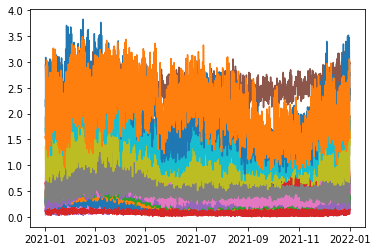

In [27]:
for cols in Wind_preds.drop(columns="datetime").columns:
    plt.plot(Wind_preds["datetime"],Wind_preds[cols])
    

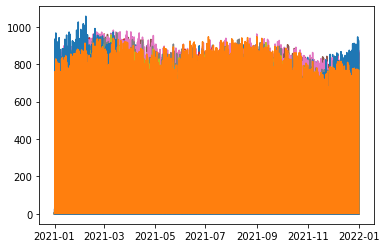

In [28]:
for cols in GHI_preds.drop(columns="datetime").columns:
    plt.plot(GHI_preds["datetime"],GHI_preds[cols])

In [29]:
GHI_preds.to_csv(data_path+"GHI_2021_preds.csv")
Wind_preds.to_csv(data_path+"Wind_2021_preds.csv")

    WindSpeed    MAX
0         4.0   1265
1         4.5   1801
2         5.0   2471
3         5.5   3289
4         6.0   4270
5         6.5   5429
6         7.0   6781
7         7.5   8340
8         8.0  10120
9         8.5  12140
10        9.0  14410
     GHI     MAX    MEAN    STD
0    200   20.25  -6.114  49.21
1    300   31.67   2.007  48.02
2    400   43.42  10.120  47.21
3    500   55.41  18.220  46.82
4    600   67.57  26.310  46.84
5    700   79.87  34.390  47.28
6    800   92.28  42.460  48.11
7    900  104.80  50.520  49.33
8   1000  117.30  58.570  50.89
9   1100  129.90  66.610  52.76
10  1200  142.60  74.640  45.91


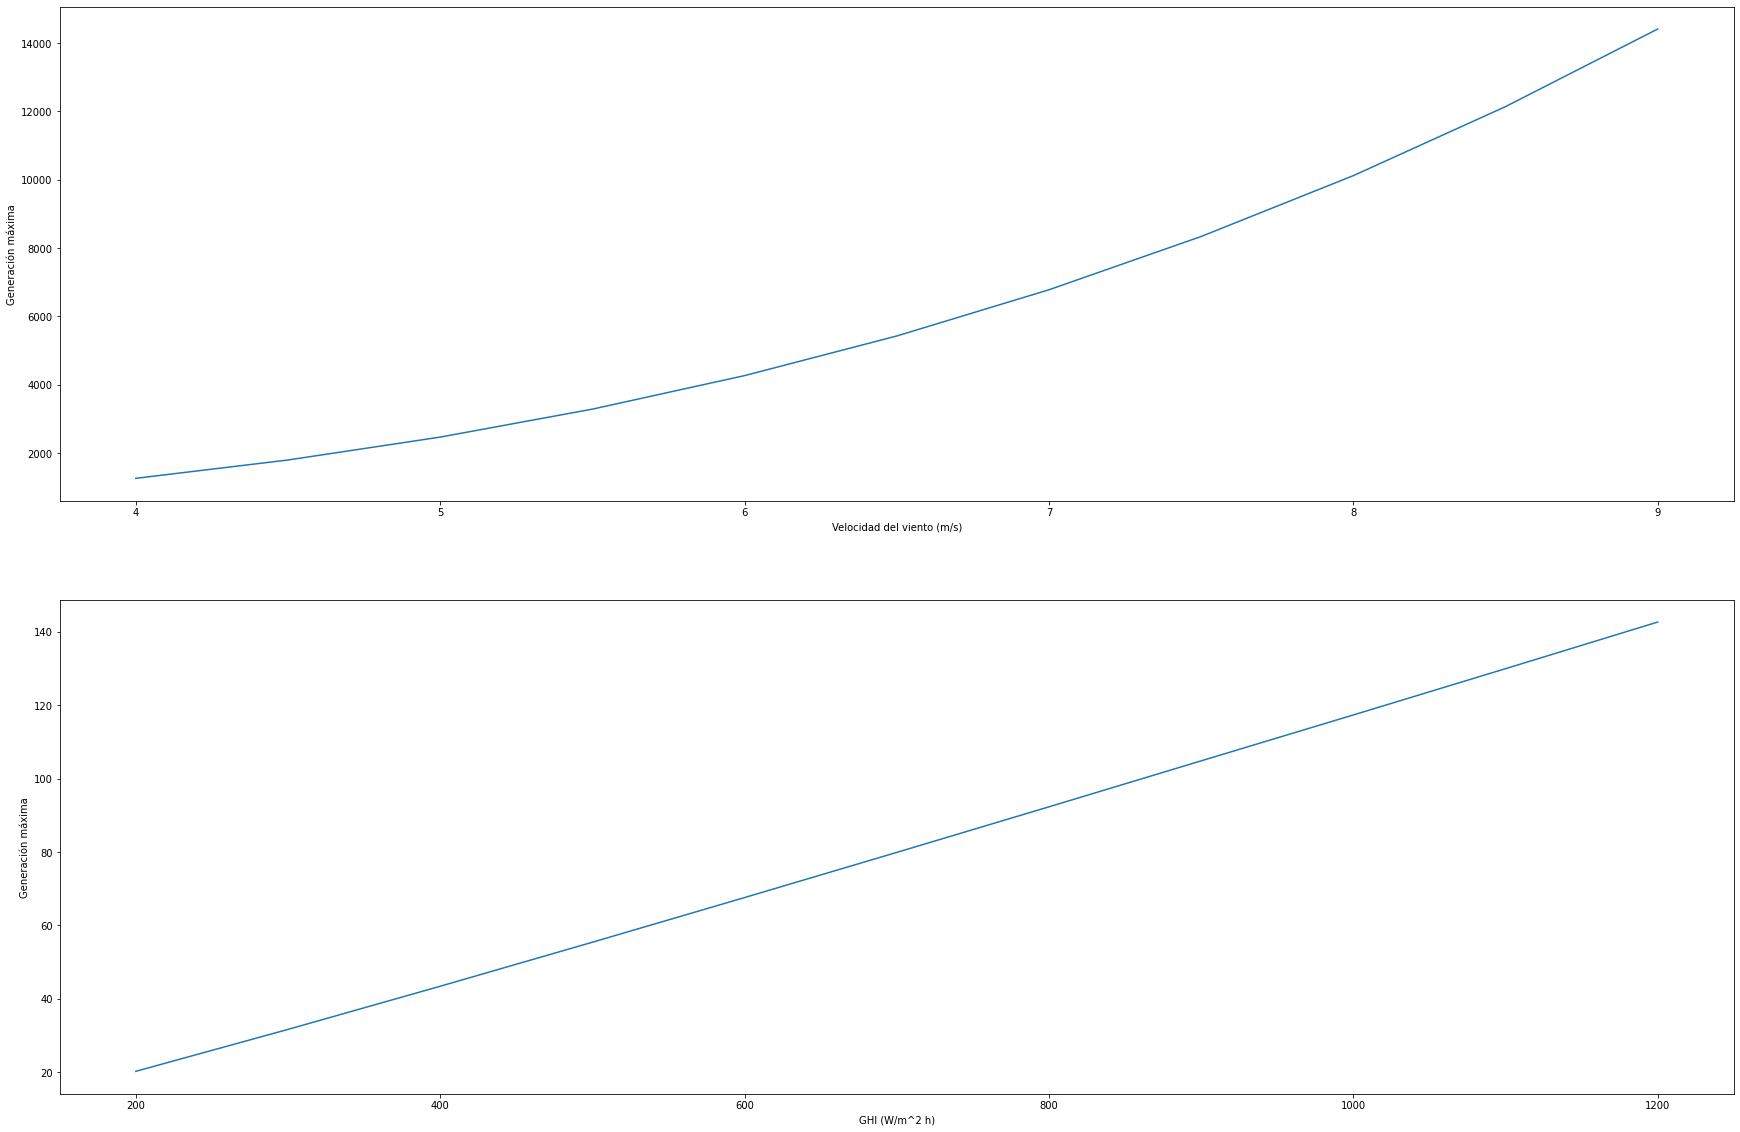

In [35]:
Wind_gen=pd.read_csv(data_path+'WindSpeed.csv')
GHI_gen=pd.read_csv(data_path+'GHI_generation.csv')
print(Wind_gen)
print(GHI_gen)
fig,axes=plt.subplots(2,1, figsize=(30,20))
axes[0].plot(Wind_gen["WindSpeed"],Wind_gen["MAX"])
axes[0].set_xlabel("Velocidad del viento (m/s)")
axes[0].set_ylabel("Generación máxima")
axes[1].plot(GHI_gen["GHI"],GHI_gen["MAX"])
axes[1].set_xlabel(r"GHI (W/m^2 h)")
axes[1].set_ylabel("Generación máxima")
# plt.show()

Vemos que hay una clara relación lineal entre la generación máxima solar y GHI mientras que para generación eolica se observa una curvatura al parecer cuadrática.

In [ ]:
model_GHI=LinearRegression.fit(GHI_gen["GHI"],GHI_gen["MAX"])
model_Wind=LinearRegression.fit([Wind_gen["WindSpeed"],Wind_gen["WindSpeed"].apply(lambda x:x**2)],Wind_gen["MAX"])
print(model_GHI.coef_)
print(model_Wind.coef_)
# def GHI_Model_apply(x):
    